In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Datasets

In [2]:
bangalore_df = pd.read_csv(r"C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Temperature_And_Precipitation_Cities_IN\Bangalore_1990_2022_BangaloreCity.csv")
chennai_df = pd.read_csv(r"C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Temperature_And_Precipitation_Cities_IN\Chennai_1990_2022_Madras.csv")
delhi_df = pd.read_csv(r"C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Temperature_And_Precipitation_Cities_IN\Delhi_NCR_1990_2022_Safdarjung.csv")
lucknow_df = pd.read_csv(r"C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Temperature_And_Precipitation_Cities_IN\Lucknow_1990_2022.csv")
mumbai_df = pd.read_csv(r"C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Temperature_And_Precipitation_Cities_IN\Mumbai_1990_2022_Santacruz.csv")
rajasthan_df = pd.read_csv(r"C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Temperature_And_Precipitation_Cities_IN\Rajasthan_1990_2022_Jodhpur.csv")
station_df = pd.read_csv(r"C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Temperature_And_Precipitation_Cities_IN\Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv")

### Bangalore

In [3]:
print(bangalore_df.shape)
bangalore_df.head()

(11894, 5)


,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [4]:
bangalore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11824 non-null  float64
 2   tmin    10505 non-null  float64
 3   tmax    11265 non-null  float64
 4   prcp    7274 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [5]:
bangalore_df['time'] = pd.to_datetime(bangalore_df['time'])

In [6]:
bangalore_df.set_index(['time'], inplace = True) #setting the time as index

## Missing Values

In [7]:
#finding percentage of null values in the data
drop_df = bangalore_df.dropna()

missing_pctg = round((drop_df.shape[0]/bangalore_df.shape[0])*100,2)
print(missing_pctg,'% of data contain NaN values')

51.14 % of data contain NaN values


In [8]:
bangalore_df[bangalore_df.isna().sum(axis=1) > 3] 

,tavg,tmin,tmax,prcp
time,,,,
1990-05-26,NaN,NaN,NaN,NaN
1990-05-27,NaN,NaN,NaN,NaN
1990-05-28,NaN,NaN,NaN,NaN
1990-05-29,NaN,NaN,NaN,NaN
1990-05-30,NaN,NaN,NaN,NaN
...,...,...,...,...
2003-06-27,NaN,NaN,NaN,NaN
2007-05-20,NaN,NaN,NaN,NaN
2007-08-28,NaN,NaN,NaN,NaN


70 rows have no data at any column

In [9]:
bangalore_df = bangalore_df.dropna(how='all') #dropping rows with no data in all columns

In [10]:
bangalore_df = bangalore_df.interpolate(method='time') #using interpolate to fill in NaN values

In [11]:
bangalore_df.isna().sum()

tavg    0
tmin    0
tmax    0
prcp    1
dtype: int64

In [12]:
bangalore_df.head()

,tavg,tmin,tmax,prcp
time,,,,
1990-01-01,22.9,19.10,28.4,NaN
1990-02-01,21.7,14.45,26.5,0.0
1990-03-01,21.0,16.40,26.5,0.0
1990-04-01,20.8,22.16,27.4,0.0
1990-05-01,20.4,14.20,26.1,0.0


In [13]:
bangalore_df.fillna(0,inplace=True) #filling the leftover nan value

In [14]:
bangalore_df.isna().sum()

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

## EDA

In [15]:
#date at which temperature(tmax) was highest
bangalore_df[bangalore_df['tmax'] == max(bangalore_df['tmax'])]

,tavg,tmin,tmax,prcp
time,,,,
2016-04-25,27.5,24.4,39.2,0.2


In [16]:
#date at which temperature(tmin) was lowest
bangalore_df[bangalore_df['tmin'] == min(bangalore_df['tmin'])]

,tavg,tmin,tmax,prcp
time,,,,
1992-08-15,21.8,9.3,26.5,2.3


In [17]:
#date at which precipitation was the highest
bangalore_df[bangalore_df['prcp'] == max(bangalore_df['prcp'])]

,tavg,tmin,tmax,prcp
time,,,,
2007-07-13,23.2,19.975,29.2,271.3


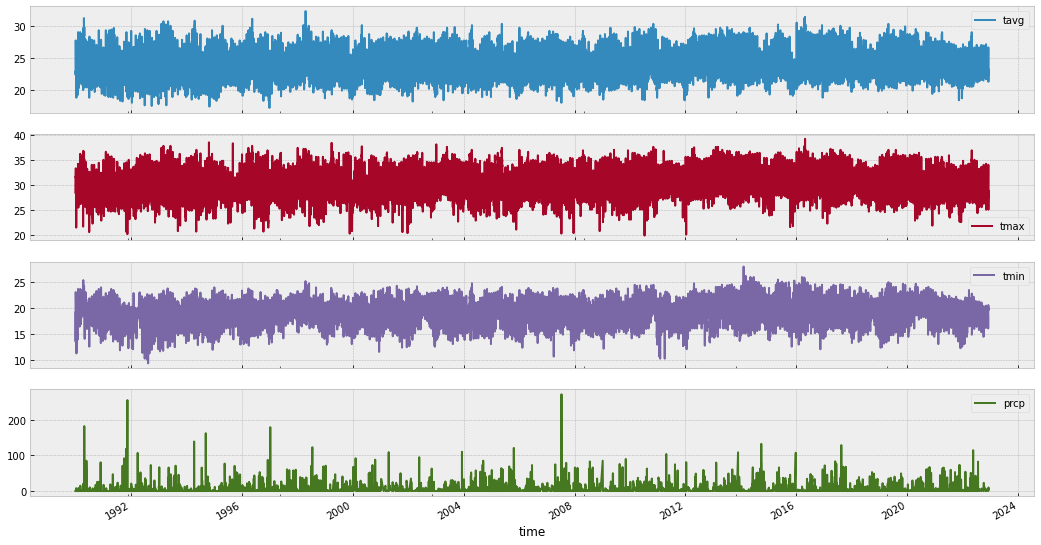

In [18]:
plt.style.use('bmh')
bangalore_df[['tavg','tmax','tmin','prcp']].plot(subplots=True, figsize=(18,10));

Data looks compressed so I will make a df with mean values yearwise

In [19]:
bangalore_year = bangalore_df.groupby(bangalore_df.index.year).mean()

In [20]:
bangalore_year #yearwise averages

,tavg,tmin,tmax,prcp
time,,,,
1990,23.703134,19.138733,29.283659,2.182514
1991,23.626111,19.063102,29.230000,4.198056
1992,23.224148,18.456659,29.145549,2.186222
1993,23.637673,18.830471,29.565789,2.589197
1994,23.427072,18.972238,29.151174,2.219475
1995,23.888611,19.182222,29.471389,3.288889
1996,23.633611,18.953472,29.737014,2.840833
1997,23.667222,19.479083,29.939403,3.318704
1998,24.226099,19.941896,30.173077,3.705495


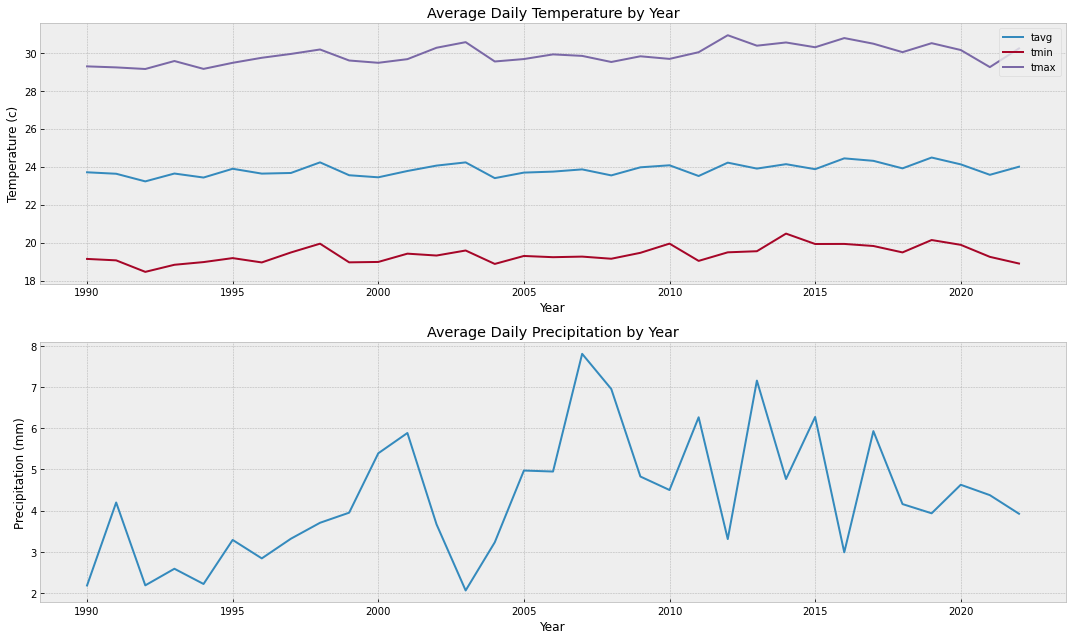

In [21]:
f, axes = plt.subplots(nrows = 2, figsize =(15,9))
ax = bangalore_year[['tavg','tmin','tmax']].plot(ax=axes[0])
ax.set_ylabel('Temperature (c)')
ax.set_xlabel('Year')
ax.set_title('Average Daily Temperature by Year')

ax = bangalore_year['prcp'].plot(ax=axes[1])
ax.set_ylabel('Precipitation (mm)')
ax.set_xlabel('Year')
ax.set_title('Average Daily Precipitation by Year')

plt.tight_layout()

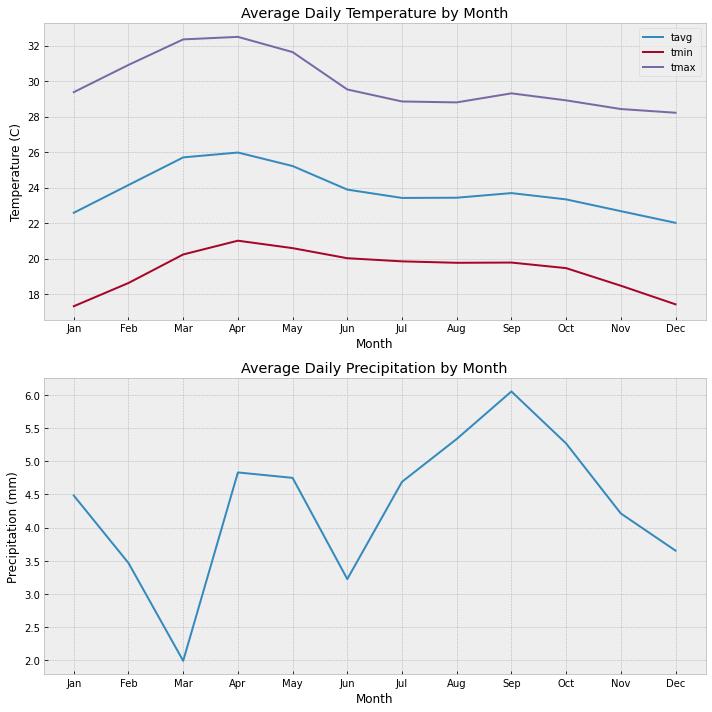

In [22]:
#by month
months = ['Jan','Feb','Mar','Apr','May','Jun',
          'Jul','Aug','Sep','Oct','Nov','Dec']

data = bangalore_df.groupby(bangalore_df.index.month, as_index=False)[['tavg','tmin','tmax','prcp']].mean()

f, axes = plt.subplots(nrows=2, figsize=(10,10))
ax = data[['tavg','tmin','tmax']].plot(ax=axes[0])
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Average Daily Temperature by Month')

ax = data['prcp'].plot(ax=axes[1]);
ax.set_ylabel('Precipitation (mm)')
ax.set_xlabel('Month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Average Daily Precipitation by Month')

plt.tight_layout()

In [23]:
bangalore_df['year'] = bangalore_df.index.year
bangalore_df['mnth'] = bangalore_df.index.month

In [24]:
month_df = bangalore_df.groupby(['year','mnth'], as_index=False)[['tavg','prcp']].mean()

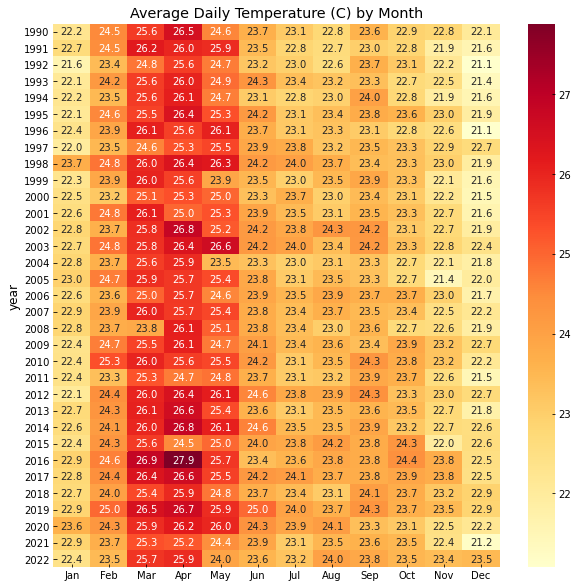

In [25]:
data = month_df.pivot('year','mnth','tavg')
data.columns = months

plt.subplots(figsize=(10,10))
sns.heatmap(data, cmap='YlOrRd',annot=True, fmt='.1f')
plt.title('Average Daily Temperature (C) by Month')
plt.yticks(rotation=0)
plt.show()

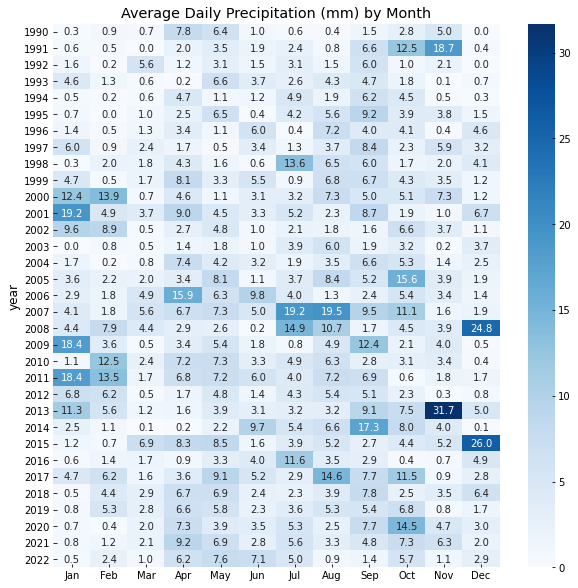

In [26]:
data = month_df.pivot('year','mnth','prcp')
data.columns = months

plt.subplots(figsize=(10,10))
sns.heatmap(data,cmap='Blues',annot=True, fmt='.1f')
plt.title('Average Daily Precipitation (mm) by Month')
plt.yticks(rotation=0)
plt.show()

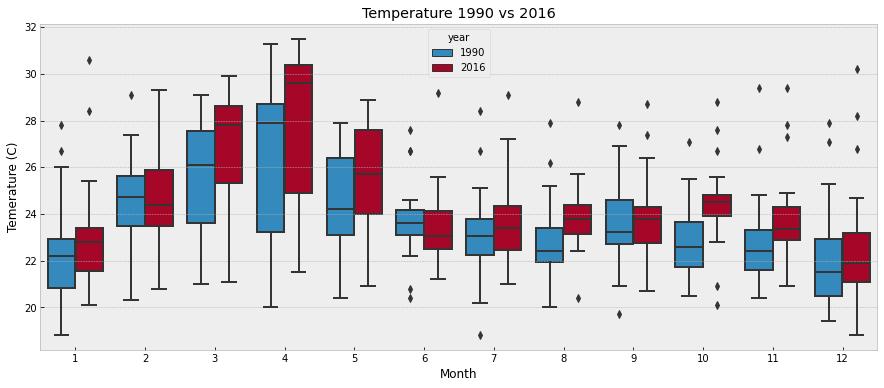

In [27]:
data = bangalore_df[bangalore_df['year'].isin([1990,2016])]

plt.subplots(figsize=(15,6))
sns.boxplot(x='mnth', y='tavg', hue='year', data=data,saturation=1)
plt.xlabel('Month')
plt.ylabel('Temerature (C)')
plt.title('Temperature 1990 vs 2016');

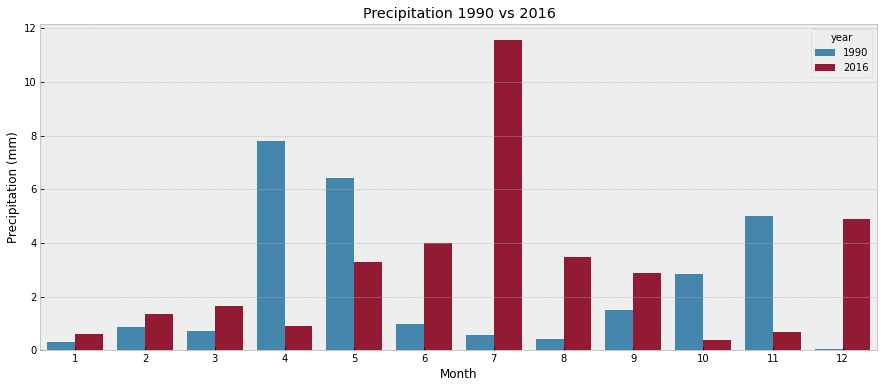

In [28]:
plt.subplots(figsize=(15,6))
sns.barplot(x='mnth',y='prcp', hue='year', data=data,ci=None)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation 1990 vs 2016');